# Wstęp do Sztucznej Inteligencji - rok akademicki 2020/2021

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Optymalizacja globalna: Prosty algorytm genetyczny - Zadania
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

## Import bibliotek

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d



## Zadanie 1  (obowiązkowe, 1pkt.)
W komórce poniżej wprowdź swój nr albumu a następnie ją wykonaj:

In [59]:
nr_albumu = 135968
nr_funkcji = (nr_albumu % 16) + 1
print('Twój nr funkcji celu to:', nr_funkcji if nr_funkcji != 6 else 7)

Twój nr funkcji celu to: 1


In [60]:
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random

Zgodnie z wygenerowanym numerem, wybierz funkcję celu ze strony: https://www.sfu.ca/~ssurjano/optimization.html z działu "Many Local Minima".

Zaplementuj ją jako funkcję w Pythonie.

Dla wszystkich funkcji przyjmujemy `N=2` tzn. rozważamy ją jako funkcję dwóch zmiennych $f(x_1, x_2)$.

TWÓJ PROGRAM:

In [ ]:
def obj_func(x1,x2):
    #zwracam odbite przez OX funkcję zeby szukac maximum(minimum ACKLEY'A)
    part_1 = -0.2*math.sqrt(0.5*(x1*x1 + x2*x2))
    part_2 = 0.5*(math.cos(2*math.pi*x1) + math.cos(2*math.pi*x2))
    value = math.exp(1) + 20 -20*math.exp(part_1) - math.exp(part_2)
    #returning the value
    return -(value) #przeciwna wartość funkcji ackleya w punkcie (x1,x2) - szukamy minimum  

## Zadanie 2  (obowiązkowe, 1pkt.)
Przygotuj wykres 3D funkcji zaimplementowanej w zadaniu nr 1.

TWÓJ PROGRAM:

Jest to 3D-PLOT funkcji ACKLEY'A


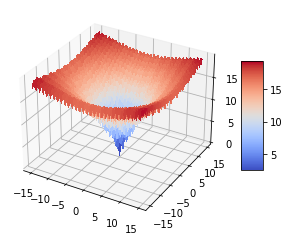

W komorce ponizej jest funkcja ackley'a odbita wzgledem OX, ktora jest właśnie zaimplementowana w zadaniu 1, żeby szukać MINIMUM GLOBALNEGO 


In [74]:
### TWÓJ KOD TUTAJ
def plot_ackley_3d():
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(-15, 15, 0.25)
    Y = np.arange(-15, 15, 0.25)
    X, Y = np.meshgrid(X, Y)

    a = 20
    b = 0.2
    c = 2 * np.pi

    sum_sq_term = -a * np.exp(-b * np.sqrt(X*X + Y*Y) / 2)
    cos_term = -np.exp((np.cos(c*X) + np.cos(c*Y)) / 2)
    Z = a + np.exp(1) + sum_sq_term + cos_term

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                                   linewidth=0, antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    print("Jest to 3D-PLOT funkcji ACKLEY'A")
    plt.show()


plot_ackley_3d()
print("W komorce ponizej jest funkcja ackley'a odbita wzgledem OX, ktora jest właśnie zaimplementowana w zadaniu 1, żeby szukać MINIMUM GLOBALNEGO ")

TO JEST TA NASZA FUNKCJA(ACKLEY odbity względem  OX) , żeby szukać MINIMUM GLOBALNEGO FUNKCJI ACKLEY'a


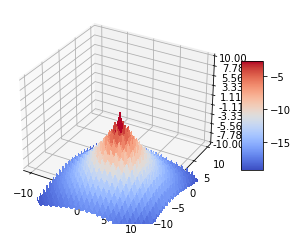

In [73]:
fig = plt.figure()
ax = fig.gca(projection='3d')
f2 = np.vectorize(obj_func)
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f2(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
print("TO JEST TA NASZA FUNKCJA(ACKLEY odbity względem  OX) , żeby szukać MINIMUM GLOBALNEGO FUNKCJI ACKLEY'a")
plt.show()

## Zadanie 3 (obowiązkowe, 2pkt.)
Korzystając z funkcji zaimplementowanych na poprzednich zajęciach, zaimplementuj główną pętlę klasycznego algorytmu genetyczengo.
![pag_schemat.png](http://torus.uck.pk.edu.pl/~amarsz/images/pag_schemat.png)

Implementacja powinna mieć postać funkcji, która przyjmuje parametry:

- `fun` - funkcja, której maksimum ma zostać znalezione
- `pop_size` - rozmiar populacji
- `pk` - prawdopodobieństwo krzyżowania
- `pm` - prawdopodobieństwo mutacji
- `generations` - liczba pokoleń 
- `dx` - dokładność kodowania

Funkcja powinna zwracać:
- `best_sol` - najlepsze znalezione rozwiązanie (nieważne, w której iteracji; UWAGA! niekoniecznie jest to najlepszy osobnik z ostatniej populacji)
- `best_generation` - numer pokolenia, z którego pochodzi najlepsze rozwiązanie
- `list_best` - lista z najlepszą oceną osobnika w każdym pokoleniu (najlepsza ocena znaleziona w danym pokoleniu lub wcześniej)
- `list_best_generation` - lista z najlepszymi ocenami w każdym pokoleniu (najlepsza ocena z danej populacji)
- `list_mean` - lista z wartościami średnimi ocen osobników z każdego pokolenia

TWÓJ PROGRAM:

In [ ]:
# Miejsce na twój kod
def generate_population(pop_size, N, a, b, dx):
    bits_n = 1 + abs(a - b) / dx
    n = 0
    coded_number = pow(2, n)
    while (coded_number < bits_n):
        n = n + 1
        coded_number = pow(2, n)

    B = n
    coded_number = coded_number - 1
    dx_new = (b - a) / coded_number
    wartosc_x = pop_size
    wartosc_y = N * B

    for i in range(0, wartosc_x):
        for j in range(0, wartosc_y):
            pop = np.random.randint(2, size=(wartosc_x, wartosc_y))

    return pop, B

def evaluate_population(obj_func, pop, N, B, a, dx):
    x = []
    decode_individuals = []
    for row in pop:
        decode_individual = []
        n = N * B
        stringer = ""
        for i, el in enumerate(row):
            stringer = stringer + str(el)
            if i % B == B - 1:
                int_stringer = int(stringer, 2)
                decoded_solution = int_stringer * dx + a
                decode_individual.append(decoded_solution)
                stringer = ""

        decode_individual = np.array(decode_individual)
        y = obj_func(decode_individual[0], decode_individual[1])
        decode_individuals.append(decode_individual)
        x.append(y)

    evaluated_pop = np.array(x)


    return evaluated_pop, decode_individuals

def roulette(pop, evaluated_pop, N, a, b, dx):
    evalsss = evaluated_pop + np.abs(evaluated_pop.min())
    probability = evalsss/evalsss.sum()
    probability_distr = probability.cumsum()
    rand = random.random()
    i_new_pop = 0
    while rand >probability_distr[i_new_pop]:
        i_new_pop+=1
        
    new_population, B = generate_population(len(pop), N, a, b, dx)
    new_population[i_new_pop] = pop[i_new_pop]

    return new_population


def cross(pop, pk):
    
    n = len(pop[0])
    m = len(pop)
    new_pop = []
    number_row = len(pop)

    for i in range(0, m):
        prawd_ciecia = random.random()
        if prawd_ciecia < pk:
            crossing_point = random.randint(0, n)
            while crossing_point < n:
                bufor = pop[i][crossing_point]
                pop[i][crossing_point] = pop[(i + 1) % number_row][crossing_point]
                pop[(i + 1) % number_row][crossing_point] = bufor
                crossing_point += 1
        new_pop.append(pop[i])
    new_pop = np.array(new_pop)
    return new_pop

def mutate(pop, pm):
    n = len(pop[0])
    m = len(pop)

    new_pop = []
    number_row = len(pop)
    for i in range(0, m):
        for j in range(0,n):
            rand_pm=random.random()
            if rand_pm < pm:
                if pop[i][j] == 1:
                    pop[i][j] =0
                else:
                    pop[i][j] =1
    new_pop=pop
    return new_pop


def evolve(fun, pop_size, pk, pm, generations, dx):
    a=-5
    b=5
    N =2
    
    pop, B = generate_population(pop_size, N, a, b, dx)

    
    evaluated_pop, decode_individuals = evaluate_population(obj_func, pop, N, B, a, dx)

    generation_beast = np.amax(evaluated_pop)
    max_index_in_generation, = np.where(evaluated_pop == generation_beast)
    index = max_index_in_generation[0]
    best_individual_in_generation = decode_individuals[index]
    averager_generation = sum(evaluated_pop)/len(evaluated_pop)
    best_sol = []
    best_generation = 0
    list_best = []
    list_best_generation = []
    list_mean = []
    best_value = generation_beast

    if generation_beast > best_value:
        best_value = generation_beast

    best_sol.append(best_individual_in_generation)
    best_sol.append(generation_beast)
    best_generation = 0
    list_best.append(best_value)
    list_best_generation.append(generation_beast)
    list_mean.append(averager_generation)

    for i in range(generations):
        n_pop_selekcja = roulette(pop, evaluated_pop, N, a, b, dx)
        n_pop_krzyzowanie = cross(n_pop_selekcja, pk)
        n_pop_mutacja = mutate(n_pop_krzyzowanie, pm)
        evaluated_pop_mutate, decode_individuals_mutate = evaluate_population(obj_func, n_pop_mutacja, N, B, a, dx)
        best_individual_in_generation = []
        generation_beast = 0
        generation_beast = np.amax(evaluated_pop_mutate)
        max_index_in_generation, = np.where(evaluated_pop_mutate == generation_beast)
        index = max_index_in_generation[0]
        best_individual_in_generation = decode_individuals_mutate[index]
        averager_generation = sum(evaluated_pop_mutate) / len(evaluated_pop_mutate)

        if generation_beast > best_value:
            
            best_value = generation_beast
            best_sol[0] = best_individual_in_generation
            best_sol[1] = generation_beast
            best_generation = i

        list_best.append(best_value)
        list_best_generation.append(generation_beast)
        list_mean.append(averager_generation)

        
        
    
    return best_sol, best_generation, list_best, list_best_generation, list_mean

## Zadanie 4 (obowiązkowe, 1pkt.)

Zaprezentuj działanie algorytmu z przykładowymi wartościami parametrów:

- `pop_size`: 60
- `pk`: 0.7
- `pm`: 0.01
- `generations`: 200
- `dx`: 1e-10

Na wykresach funkcji 3D przedstaw położenie osobników z pierwszej populacji, w połowie ewolucji oraz końcowej populacji. Zaznacz wyraźnie położenie najlepszeg rozwiązania.

Na wykresach 2D przedstaw przebieg wartości z list z zebranymi statystykami (listy `list_best`, `list_best_generation`, `list_mean`) w zależności od numeru pokolenia. 

TWÓJ PROGRAM:

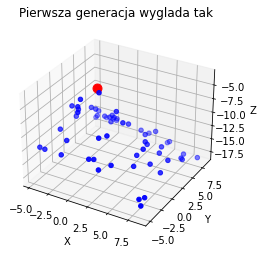

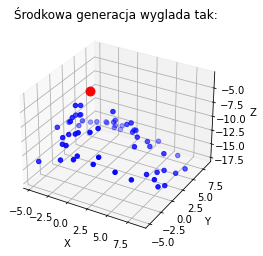

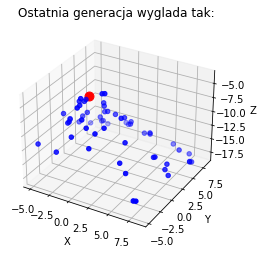

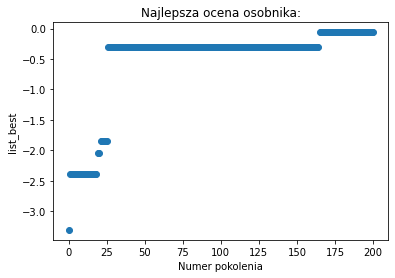

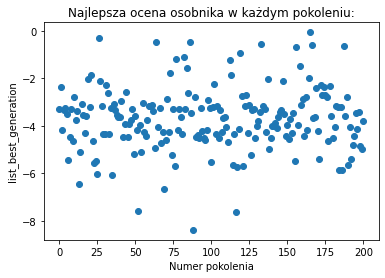

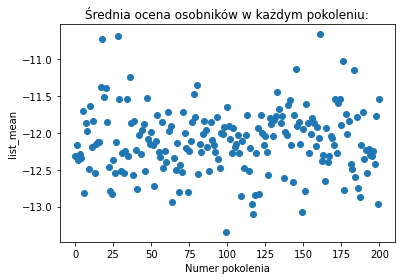

[array([-0.0178032 ,  0.00496498]), -0.06134870295483408]
x =  -0.017803204099999803
y =  0.004964976500000162
z =  -0.06134870295483408
Min. =  0.06134870295483408  lokalizacja punktowa:  -0.017803204099999803 ,  0.004964976500000162
Generacja z best rozwiazaniem:  164


In [55]:
# Miejsce na twój kod

def ackley_plot_3d(generations, title):

    def my_cel_funct(e):
        return e[1]
    generations.sort(key=my_cel_funct)

    x_values = []
    y_values = []
    z_values = []
    x = []
    y = []
    z = []

    for xy, z0 in (generations):
        x_values.append(xy[0])
        y_values.append(xy[1])
        z_values.append(z0)

  
    for i in range(0,len(x_values)-1):
        x.append(x_values[i])
        y.append(y_values[i])
        z.append(z_values[i])

    z_max = z_values[-1]
    x_max = x_values[-1]
    y_max = y_values[-1]



    colors = ['red', 'green', 'blue', 'black']

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='b', marker='o')
    ax.scatter(x_max, y_max, z_max, c='r', marker='o', s=80)
    plt.title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
    
def ackley_plot_2d(list_value, y_label, title):
    x = []
    for index in range(len(list_value)):
        x.append(index)

    fig = plt.figure()
    plt.scatter(x, list_value)
    plt.xlabel("Numer pokolenia")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    

def evolve_for_plot(fun, pop_size, pk, pm, generations, dx):
    a=-5
    b=5
    N = 2

    pop, B = generate_population(pop_size, N, a, b, dx)


    evaluated_pop, decode_individuals = evaluate_population(obj_func, pop, N, B, a, dx)

    first_gen =[]
    for j in range(0, len(evaluated_pop)):
        first_gen.append([decode_individuals[j], evaluated_pop[j]])
    ackley_plot_3d(first_gen, "Pierwsza generacja wyglada tak")


    gen_beast = np.amax(evaluated_pop)
    max_index_in_generation, = np.where(evaluated_pop == gen_beast)
    index = max_index_in_generation[0]
    best_individual_in_generation = decode_individuals[index]
    average_genner = sum(evaluated_pop)/len(evaluated_pop)


    best_sol = []
    best_generation = 0
    list_best = []
    list_best_generation = []
    list_mean = []
    best_value = gen_beast


    if gen_beast > best_value:
        best_value = gen_beast

    best_sol.append(best_individual_in_generation)
    best_sol.append(gen_beast)
    best_generation = 0
    list_best.append(best_value)
    list_best_generation.append(gen_beast)
    list_mean.append(average_genner)

    for i in range(generations):
        
        n_pop_selekcja = roulette(pop, evaluated_pop, N, a, b, dx)
        n_pop_cross = cross(n_pop_selekcja, pk)
        n_pop_mutation = mutate(n_pop_cross, pm)

        evaluated_pop_mutate, decode_individuals_mutate = evaluate_population(obj_func, n_pop_mutation, N, B, a, dx)

        if i == int(generations/2):
            medium_generation = []
            for j in range(0, len(evaluated_pop)):
                medium_generation.append([decode_individuals_mutate[j], evaluated_pop_mutate[j]])
            ackley_plot_3d(medium_generation, "Środkowa generacja wyglada tak:")
            
        if i == (generations-1):
            last_generation = []
            for j in range(0, len(evaluated_pop)):
                last_generation.append([decode_individuals_mutate[j], evaluated_pop_mutate[j]])
            ackley_plot_3d(last_generation, "Ostatnia generacja wyglada tak:")

        best_individual_in_generation = []
        gen_beast = 0
        gen_beast = np.amax(evaluated_pop_mutate)
        max_index_in_generation, = np.where(evaluated_pop_mutate == gen_beast)
        index = max_index_in_generation[0]
        best_individual_in_generation = decode_individuals_mutate[index]
        
        average_genner = sum(evaluated_pop_mutate) / len(evaluated_pop_mutate)

        if gen_beast > best_value:
            best_value = gen_beast
            best_sol[0] = best_individual_in_generation
            best_sol[1] = gen_beast
            best_generation = i
            

        list_best.append(best_value)
        list_best_generation.append(gen_beast)
        list_mean.append(average_genner)

    
    return best_sol, best_generation, list_best, list_best_generation, list_mean




best_sol, best_generation, list_best, list_best_generation, list_mean = evolve_for_plot(obj_func, 60, 0.7, 0.01, 200, 1e-10)
ackley_plot_2d(list_best, "list_best", "Najlepsza ocena osobnika:")
ackley_plot_2d(list_best_generation, "list_best_generation", "Najlepsza ocena osobnika w każdym pokoleniu:")
ackley_plot_2d(list_mean, "list_mean", "Średnia ocena osobników w każdym pokoleniu:")
print(best_sol)
print("x = ", best_sol[0][0])
print("y = ", best_sol[0][1])
print("z = ", best_sol[1])
print("Min. = ", -best_sol[1], " lokalizacja punktowa: ", best_sol[0][0], ", ", best_sol[0][1])
print("Generacja z best rozwiazaniem: ", best_generation)







## Zadanie 5 (obowiązkowe, 5pkt.)

Zbadaj wpływ parametrów klasycznego algorytmu genetycznego na jego zdolność znalezienia optymalnego rozwiązania. Dla ułatwienia analizy, zmieniając jeden parametr, zachowaj typowe wartości pozostałych.

1. Jak działa algorytm z typowymi ustawieniami parametrów (jak w zadaniu 4)? Podaj średnią wartość przystosowania znalezionego rozwiązania po wielokrotnym uruchomieniu AG.
2. Czy wydłużenie ewolucji przynosi poprawę czy też następuje "nasycenie"? Porównaj zarówno jak dobre rozwiązanie zostało znalezione jak również w której generacji.
    - `generations`: kilka różnych wartości z przedziału [100, 10000]
3. Czy mutacja jest potrzebna? 
    - `pm` = 0.0
4. Jak działa algorytm bez krzyżowania, z samą mutacją? 
    - `pk` = 0.0
5. Czy lepiej jest dłużej ewoluować mniejszą populację czy krócej większą, jeśli liczba ewaluacji funkcji jest taka sama (np. 2000)?
    - porównaj dwa ustawienia: `pop_size`=20, `generations`=100  vs. `pop_size`=100, `generations`=20.

UWAGA: Powyższe porównania powinny być wykonane na podstawie uśrednionych wyników co najmniej 10 uruchomień algorytmu z danymi parametrami. Podając wyniki podaj średnią z najlepszych znalezionych rozwiązań oraz odchylenie standardowe oraz numer pokolenia, w którym znaleziono rozwiązanie.

TWÓJ PROGRAM:

In [56]:
def evolve_forrer_func(exec_num, pop_size, pk, pm, generations, dx):
    list_beast_sol = []
    list_beast_x1 = []
    list_beast_x2 = []
    list_beast_generation_nr = []
    for i in range(exec_num):
        beast_sol_2, beast_generation_2, list_beast_2, list_beast_generation_2, list_mean_2 = evolve(obj_func, pop_size, pk, pm, generations, dx)

        list_beast_sol.append(-beast_sol_2[1])
        list_beast_x1.append(beast_sol_2[0][0])
        list_beast_x2.append(beast_sol_2[0][1])
        list_beast_generation_nr.append(beast_generation_2)


    average_beast_value = sum(list_beast_sol) / len(list_beast_sol)
    std_deviat_value = np.std(list_beast_sol)
    average_beast_x1 = sum(list_beast_x1) / len(list_beast_x1)
    average_beast_x2 = sum(list_beast_x2) / len(list_beast_x2)
    average_beast_generation_nr = int(sum(list_beast_generation_nr) / len(list_beast_generation_nr))

    return average_beast_value, std_deviat_value, average_beast_x1, average_beast_x2, average_beast_generation_nr

pd.set_option('display.max_columns', None)

print("\n\nZADANIE 5_1.\n\n")
average_beast_value_1, std_deviat_value_1, average_beast_x1_1, average_beast_x2_1, average_beast_generation_nr_1 = evolve_forrer_func(10, 60, 0.7, 0.01, 200, 1e-10)
diction_for_podpunct_1_col= ["beast wynik", "Odchylenie standard", "X1", "X2", "Numer generacji"]
diction_for_podpunct_1 = [average_beast_value_1, std_deviat_value_1, average_beast_x1_1, average_beast_x2_1, average_beast_generation_nr_1]
modified_diction_for_podpunct_1 = pd.DataFrame([diction_for_podpunct_1], columns=diction_for_podpunct_1_col)
modified_diction_for_podpunct_1.style.set_table_attributes("style='display:inline'").set_caption("podpunkt 1")
print(modified_diction_for_podpunct_1)

print("\n\nZADANIE 5_3.\n\n")
average_beast_value_3, std_deviat_value_3, average_beast_x1_3, average_beast_x2_3, average_beast_generation_nr_3 \
        = evolve_forrer_func(10, 60, 0.0, 0.01, 200, 1e-10)
diction_for_podpunct_3_col = ["beast wynik", "Odchylenie standard", "X1", "X2", "Numer generacji"]
diction_for_podpunct_3 = [average_beast_value_3, std_deviat_value_3, average_beast_x1_3, average_beast_x2_3, average_beast_generation_nr_3]
modified_diction_for_podpunct_3 = pd.DataFrame([diction_for_podpunct_3], columns=diction_for_podpunct_3_col)
modified_diction_for_podpunct_3.style.set_table_attributes("style='display:inline'").set_caption("podpunkt 3")
print(modified_diction_for_podpunct_3)

print("\n\nZADANIE 5_4.\n\n")
average_beast_value_4, std_deviat_value_4, average_beast_x1_4, average_beast_x2_4, average_beast_generation_nr_4 \
        = evolve_forrer_func(10, 60, 0.7, 0.0, 200, 1e-10)
diction_for_podpunct_4_col = ["beast wynik", "Odchylenie standard", "X1", "X2", "Numer generacji"]
diction_for_podpunct_4 = [average_beast_value_4, std_deviat_value_4, average_beast_x1_4, average_beast_x2_4, average_beast_generation_nr_4]
modified_diction_for_podpunct_4 = pd.DataFrame([diction_for_podpunct_4], columns=diction_for_podpunct_4_col)
modified_diction_for_podpunct_4.style.set_caption("podpunkt 4")
print(modified_diction_for_podpunct_4)

print("\n\nZADANIE 5_5.\n\n")
list_avg_beast_value_5 = []
list_std_dev_value_5 = []
list_avg_beast_x1_5 = []
list_avg_beast_x2_5 = []
list_avg_beast_gen_nr_5 = []
list_pop_nr_5 = []
list_gen_nr_5 = []

average_beast_value_5_1, std_deviat_value_5_1, average_beast_x1_5_1, average_beast_x2_5_1, average_beast_generation_nr_5_1 \
        = evolve_forrer_func(10, 20, 0.7, 0.01, 100, 1e-10)
list_avg_beast_value_5.append(average_beast_value_5_1)
list_std_dev_value_5.append(std_deviat_value_5_1)
list_avg_beast_x1_5.append(average_beast_x1_5_1)
list_avg_beast_x2_5.append(average_beast_x2_5_1)
list_avg_beast_gen_nr_5.append(average_beast_generation_nr_5_1)
list_pop_nr_5.append(20)
list_gen_nr_5.append(100)

average_beast_value_5_2, std_deviat_value_5_2, average_beast_x1_5_2, average_beast_x2_5_2, average_beast_generation_nr_5_2 \
        = evolve_forrer_func(10, 100, 0.7, 0.01, 20, 1e-10)
list_avg_beast_value_5.append(average_beast_value_5_2)
list_std_dev_value_5.append(std_deviat_value_5_2)
list_avg_beast_x1_5.append(average_beast_x1_5_2)
list_avg_beast_x2_5.append(average_beast_x2_5_2)
list_avg_beast_gen_nr_5.append(average_beast_generation_nr_5_2)
list_pop_nr_5.append(100)
list_gen_nr_5.append(20)

diction_for_task = {"Liczebność populacji": list_pop_nr_5, "Liczebność generacji":list_gen_nr_5, "Beast wynik": list_avg_beast_value_5, "Odchylenie standardowe": list_std_dev_value_5, "X1": list_avg_beast_x1_5,
            "X2": list_avg_beast_x2_5,"Numer generacji": list_avg_beast_gen_nr_5}
modified_diction_for_task = pd.DataFrame(data=diction_for_task)
modified_diction_for_task.style.set_table_attributes("style='display:inline'").set_caption("podpunkt 5")
print(modified_diction_for_task)



ZADANIE 5_1.


   Best wynik  Odchylenie standard        X1       X2  Numer generacji
0    0.341825             0.190004 -0.028495  0.01274              116


ZADANIE 5_3.


   Best wynik  Odchylenie standard        X1       X2  Numer generacji
0    0.355454             0.248989  0.005683 -0.02305               87


ZADANIE 5_4.


   Best wynik  Odchylenie standard        X1        X2  Numer generacji
0    0.302176             0.193655  0.015504  0.009135              101


ZADANIE 5_5.


   Liczebność populacji  Liczebność generacji  Beast wynik  \
0                    20                   100     1.127452   
1                   100                    20     1.585244   

   Odchylenie standardowe        X1        X2  Numer generacji  
0                0.861743 -0.121501 -0.014417               60  
1                0.750524 -0.112761 -0.123606                7  


In [54]:
print("\n\nZADANIE 5_2.\n\n")
list_avg_best_value = []
list_std_dev_value = []
list_avg_best_x1 = []
list_avg_best_x2 = []
list_avg_best_gen_nr = []
list_pop_nr = []
list_gen_nr = []

generation_nr_list = [100,300, 600, 900]
for generation_nr in generation_nr_list:
    average_best_value_2, std_deviation_value_2, average_best_x1_2, average_best_x2_2, average_best_generation_nr_2 = evolve_forrer_func(10, 60, 0.7, 0.01, generation_nr, 1e-10)
    list_gen_nr.append(generation_nr)
    list_avg_best_value.append(average_best_value_2)
    list_std_dev_value.append(std_deviation_value_2)
    list_avg_best_x1.append(average_best_x1_2)
    list_avg_best_x2.append(average_best_x2_2)
    list_avg_best_gen_nr.append(average_best_generation_nr_2)



d_2 = {"Leczebność generacji ": list_gen_nr, "Best wynik": list_avg_best_value, "Odchylenie standard.": list_std_dev_value, "X1": list_avg_best_x1, "X2": list_avg_best_x2,"Numer generacji": list_avg_best_gen_nr}
df_2 = pd.DataFrame(data=d_2)
df_2.style.set_table_attributes("style='display:inline'").set_caption("Podpunkt 2")
print(df_2)





ZADANIE 5_2.


   Leczebność generacji   Best wynik  Odchylenie standard.        X1  \
0                    100    0.757037              0.478811 -0.010402   
1                    300    0.180892              0.220915 -0.006480   
2                    600    0.151680              0.083033 -0.002176   
3                    900    0.101044              0.049331 -0.001453   

         X2  Numer generacji  
0 -0.013171               54  
1 -0.000267              149  
2  0.012366              306  
3  0.005296              383  


UMIEŚĆ TWOJE WNIOSKI I KOMENTARZE W KOMÓRCE PONIŻEJ

Wnioski do podpunktów z zadania 5


1)
Dla podanych parametrów średni rezultat z najlepszych wyników uzyskałem wynosił 0.341825, dla punktów x1 = -0.028495   i x2 = 0.01274. Dla funkcji Ackley'a :  minimum  funkcji wynosi 0 dla punktów f(x*)=0, x* = (0,...,0), więc uzyskany minimum w wyniku działań  jest zbliżony (Średni  Nr.generacji : 116).


2)
Wydłużenie ewolucji zwiększa naszą dokładnośc . Jednak  w pewnym momencie dalsze działanie funkcji  mutate i cross może być bez sensu, wtedy jak zachodzi "nasycenie". Dzieje się tak gdy  numer generacji z najlepszym wynikiem nie zmienia się  podczas zwiększania liczby generacji. W tym wypadku po przeprowadzonym symulacjach dla liczby generacji równej 100, 300, 600, 900 nie można stuprocentowo określić nasycenia.
Bo ze zwiększeniem liczby generacji najlepszy wynik zbliżał się do granicy  punktu  ( 0.0 ) .


3)  
Aby zbadać tematykę MUTATE'u na algorytm genetyczny, w kilku próbach zmieniono współczynnik pm na równy 0. W takim przypadku widać, że przy takich samych paramterach co w poprzednich punktach, jedynie zmienionym pm na 0 uzyskany najlepszy średni wynik wynosił (0.355454).
WNIOSEK Z MUTACJI :
Zbyt silna mutacja przynosi efekt odwrotny do zamierzonego: zamiast subtelnie różnicować dobre rozwiązania - niszczy je. Stąd w procesie ewolucji mutacja ma znaczenie drugorzędne, szczególnie w przypadku długich chromosomów.


4)
Aby zbadać tematykę CROSS'u na algorytm genetyczny, w kilku próbach zmieniono szansę na krzyżowanie 'pk' na  0. 
Uzyskany wynik okazał się dość blizki do  tego  z punktu 1.(to samo z punktami  x1 i x2 z dwóch podpunktów). 
WNIOSEK Z CROSS'U:
krzyżowanie nie jest niezbędne, ale  pomocne w algorytmach genetycznych podczas optymalizacji, modelowania(w optymalizacji naszej funkcji nie było widać całej efektywności crossingu, ale  jestem pewny, że w innych , może nielicznych zadaniach optymalizacji, modelowania  jest to bardzo efektywne w trakcie poszukiwania rozwiązań problemu.


5)
Szukamy odpowiedzi na zadanie: 'Czy lepiej jest dłużej ewoluować mniejszą populację czy krócej większą jeśli liczba ewaluacji funkcji jest taka sama?'.
Porównujemy dlatego dwa warunki, gdzie pop_size=20, generations=100 oraz pop_size=100, generations=20. 
Dzięki wynikom ciężko stwierdzić , w którym przypadku wynik będzie dokładniejszy , bo przy większej ilości działania kodu  wyniki będą graniczyły ze sobą  - algorytm w dwóch przypadkach działa prawie identycznie,analogicznie.


&copy; Katedra Informatyki, Politechnika Krakowska